In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed state-level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above.

Don't forget to apply the most suitable missing-value-filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.

3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable.

4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

5. Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?

6. If your variable of interest is the budget deficit variable, which method do you think is the most appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question?

*Please add the URL of the assignments you uploaded to Github to the Online Text section.

In [42]:
import pandas as pd
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import numpy as np

In [43]:
## Load the data from the file.  We should crete a data_fram showing
## the columns that we have an interest in.  Also provide some info
## about those problems

In [44]:
data_frame_1 = pd.read_csv("states_all_clean.csv")

In [45]:
data_frame_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1715 non-null   float64
 4   TOTAL_REVENUE                 1715 non-null   float64
 5   FEDERAL_REVENUE               1715 non-null   float64
 6   STATE_REVENUE                 1715 non-null   float64
 7   LOCAL_REVENUE                 1715 non-null   float64
 8   TOTAL_EXPENDITURE             1715 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1715 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1715 non-null   float64
 11  OTHER_EXPENDITURE             1715 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1715 non-null   float64
 13  GRA

In [46]:
data_frame_2 = data_frame_1[[ "PRIMARY_KEY", "STATE", "YEAR", "TOTAL_REVENUE", "TOTAL_EXPENDITURE"]].copy()
data_frame_2.head()

,PRIMARY_KEY,STATE,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE
0,1992_ALABAMA,ALABAMA,1992,2678885.0,2653798.0
1,1992_ALASKA,ALASKA,1992,1049591.0,972488.0
2,1992_ARIZONA,ARIZONA,1992,3258079.0,3401580.0
3,1992_ARKANSAS,ARKANSAS,1992,1711959.0,1743022.0
4,1992_CALIFORNIA,CALIFORNIA,1992,26260025.0,27138832.0


In [47]:
data_frame_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PRIMARY_KEY        1715 non-null   object 
 1   STATE              1715 non-null   object 
 2   YEAR               1715 non-null   int64  
 3   TOTAL_REVENUE      1715 non-null   float64
 4   TOTAL_EXPENDITURE  1715 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 67.1+ KB


In [48]:
data_frame_2.describe()

,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE
count,1715.000000,1.715000e+03,1.715000e+03
mean,2002.075219,8.071645e+06,8.189349e+06
std,9.568621,1.028917e+07,1.048349e+07
min,1986.000000,4.656500e+05,4.816650e+05
25%,1994.000000,2.992297e+06,3.004448e+06
50%,2002.000000,5.085826e+06,5.242672e+06
75%,2010.000000,8.165744e+06,8.220253e+06
max,2019.000000,8.921726e+07,8.532013e+07


In [49]:
#
# Verify there are no missing values
#
print("Number of missing values -- ",data_frame_2.isna().sum().sum())

Number of missing values --  0


## Two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. 
Do these variables have outlier values?

Text(0.5, 1.0, 'boxplot show the outliers')

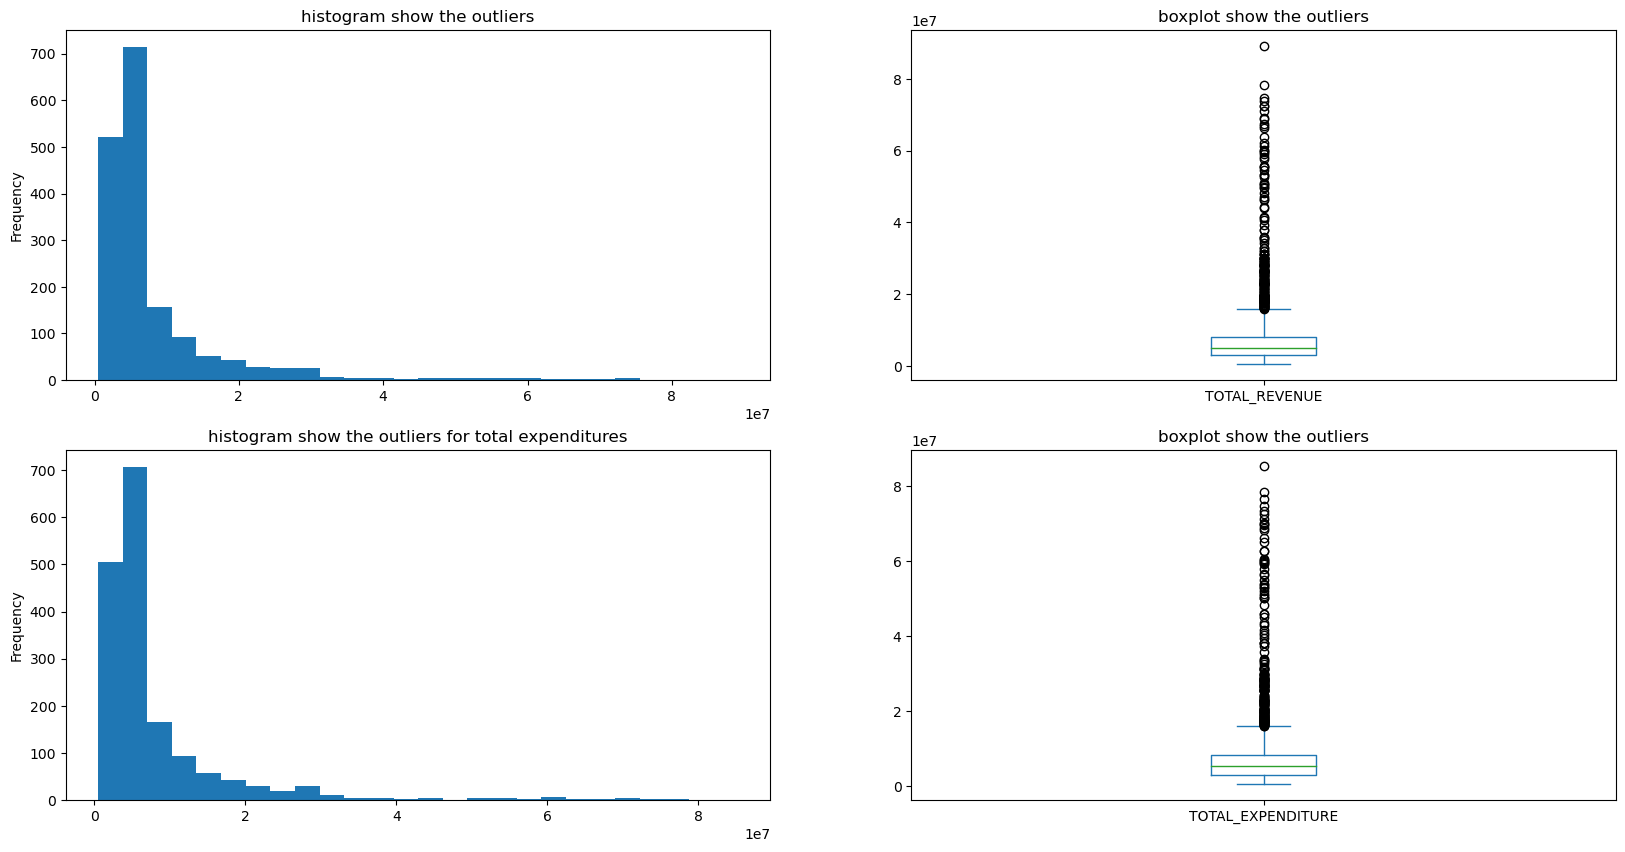

In [50]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
data_frame_2["TOTAL_REVENUE"].plot.hist(bins=26,ax=ax[0,0])
ax[0,0].set_title("histogram show the outliers")

# Box plot showing the outliers
data_frame_2["TOTAL_REVENUE"].plot.box(ax=ax[0,1])
ax[0,1].set_title("boxplot show the outliers")

# Histogram
# Used when the data is not skewed.
data_frame_2["TOTAL_EXPENDITURE"].plot.hist(bins=26,ax=ax[1,0])
ax[1,0].set_title("histogram show the outliers for total expenditures")

# Box plot showing the outliers
# Used when the data is skewed
data_frame_2["TOTAL_EXPENDITURE"].plot.box(ax=ax[1,1], whis=1.5)
ax[1,1].set_title("boxplot show the outliers")

## Find the outliers

In [51]:
# could have used zscore which is based on mean, IRQ based on median

def find_outliers_IRG(data_frame, Column):
    '''
        find the outliers on the whisker plot
        input : the column to check for outliers
        output: The outliers below the quartile 1 and quartile 3
    '''
    column = data_frame[Column]
    q1 = column.quantile(.25)
    q3 = column.quantile(.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    
    print("The lower and upper bounds are: ", lower, upper)
    
    min_outliers = column[ column < lower ]
    max_outliers = column[ column >= upper ]
    return (min_outliers, max_outliers)

def show_outlier_irq(data_frame, Column, label):
    '''
        Calculates the outlier will print 2 sections
            1. outliers below quartile 1 will print the 
               min/max for that set of outliers
            2. ourliers above quartile 3 will print the 
               min/max for that set of outliers
         Any section without values will display something.
    '''
    (min_outliers, max_outliers) = find_outliers_IRG(data_frame, Column)
    print("--- " + label)
    print("The number of outliers is ", len(min_outliers) + len(max_outliers))
    if ( len(max_outliers) != 0):
        print("The max outlier is ", max(max_outliers))
        print("The min of the max outlier is ", min(max_outliers))
    
    if len(min_outliers) != 0:
        print("The min outlier is ", min(min_outliers))
        print("The max of the min outlier is ", min(min_outliers))



In [52]:
# Can change the outlier starting point if recommended by teh Subject matter expert
# Have her check the equations
show_outlier_irq(data_frame_2, "TOTAL_EXPENDITURE", "Total Expenditure")

The lower and upper bounds are:  -4819258.25 16043959.75
--- Total Expenditure
The number of outliers is  195
The max outlier is  85320133.0
The min of the max outlier is  16113212.0


In [53]:
### Find using Z-Score

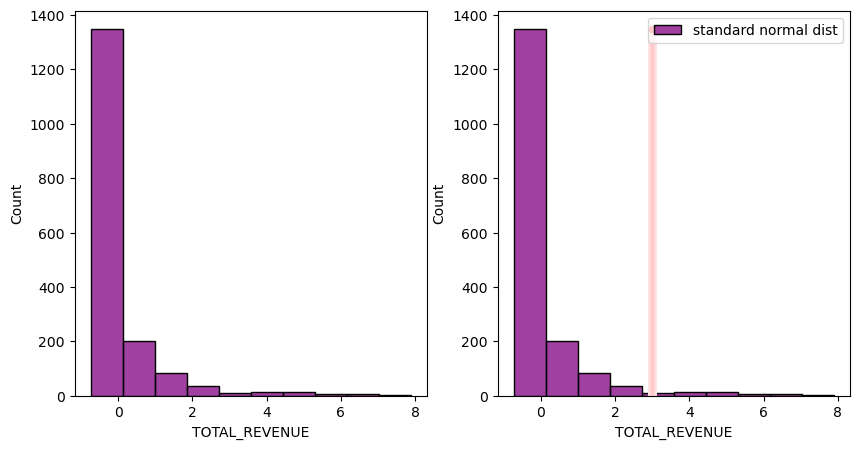

In [54]:
import seaborn as sns
from scipy.stats import zscore
fig,ax = plt.subplots(1,2,figsize=(10,5))

z_score = zscore(data_frame_2["TOTAL_REVENUE"])
sns.histplot(z_score, color='purple', ax=ax[0], label='standard normal dist', bins=10)

z_score2 = zscore(data_frame_2['TOTAL_EXPENDITURE'])
sns.histplot(z_score, color='purple', ax=ax[1], label='standard normal dist', bins=10)

Line=pd.Series(\
               np.ones(data_frame_2['TOTAL_REVENUE'].value_counts(bins=10).iloc[0]) * 3,
               range(data_frame_2['TOTAL_REVENUE'].value_counts(bins=10).iloc[0]))

sns.scatterplot(x=Line.values, y=Line.index, ax = ax[1], color='red')
plt.legend()
plt.show()


In [55]:
for i in range(1,5):
    print("The score threshold is {}".format(i))
    print("The indicies of the outliers:")
    list_of_numbers = np.where(z_score > i)
    print("number of outliers are", len(list_of_numbers))
    print("Number of outliers is: {}".format(len(np.where(z_score > i)[0])))
    print("---"*30)

The score threshold is 1
The indicies of the outliers:
number of outliers are 1
Number of outliers is: 164
------------------------------------------------------------------------------------------
The score threshold is 2
The indicies of the outliers:
number of outliers are 1
Number of outliers is: 70
------------------------------------------------------------------------------------------
The score threshold is 3
The indicies of the outliers:
number of outliers are 1
Number of outliers is: 43
------------------------------------------------------------------------------------------
The score threshold is 4
The indicies of the outliers:
number of outliers are 1
Number of outliers is: 33
------------------------------------------------------------------------------------------


In [56]:
from scipy.stats import zscore

In [57]:
for i in range(1,5):
    print("The score threshold is {}".format(i))
    print("The indices of the outliers:")
    print("Number of outliers is: {} ".format(len((np.where(z_score > i) [0]))))
    print("--"*35)

The score threshold is 1
The indices of the outliers:
Number of outliers is: 164 
----------------------------------------------------------------------
The score threshold is 2
The indices of the outliers:
Number of outliers is: 70 
----------------------------------------------------------------------
The score threshold is 3
The indices of the outliers:
Number of outliers is: 43 
----------------------------------------------------------------------
The score threshold is 4
The indices of the outliers:
Number of outliers is: 33 
----------------------------------------------------------------------


In [58]:
# Good for skewed data sijnce it is calculated based on median
show_outlier_irq(data_frame_2, "TOTAL_REVENUE", "Total Revenue")

The lower and upper bounds are:  -4767873.5 15925914.5
--- Total Revenue
The number of outliers is  195
The max outlier is  89217262.0
The min of the max outlier is  15939477.0


## Remove the detected outliers

Detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE 

variables, apply the techniques you learned in this checkpoint to 
eliminate them and validate that there are no outlier values after 
you handled them.

Logrithm -- compare the distances between 100, 10000, 100000 there the logarithmic scale
The distance betwen each two would be the same ( 100, 1000).  Logarithmic is different 
from zscore 

# Double Check Again
Winsorize -- It limits the outliers.  Replace all the exteme values for the lower value 
it will replace the with first value at the perdent tile,  Replace all the extrme values abvove the 11th percentile.  Have 40% and 89%

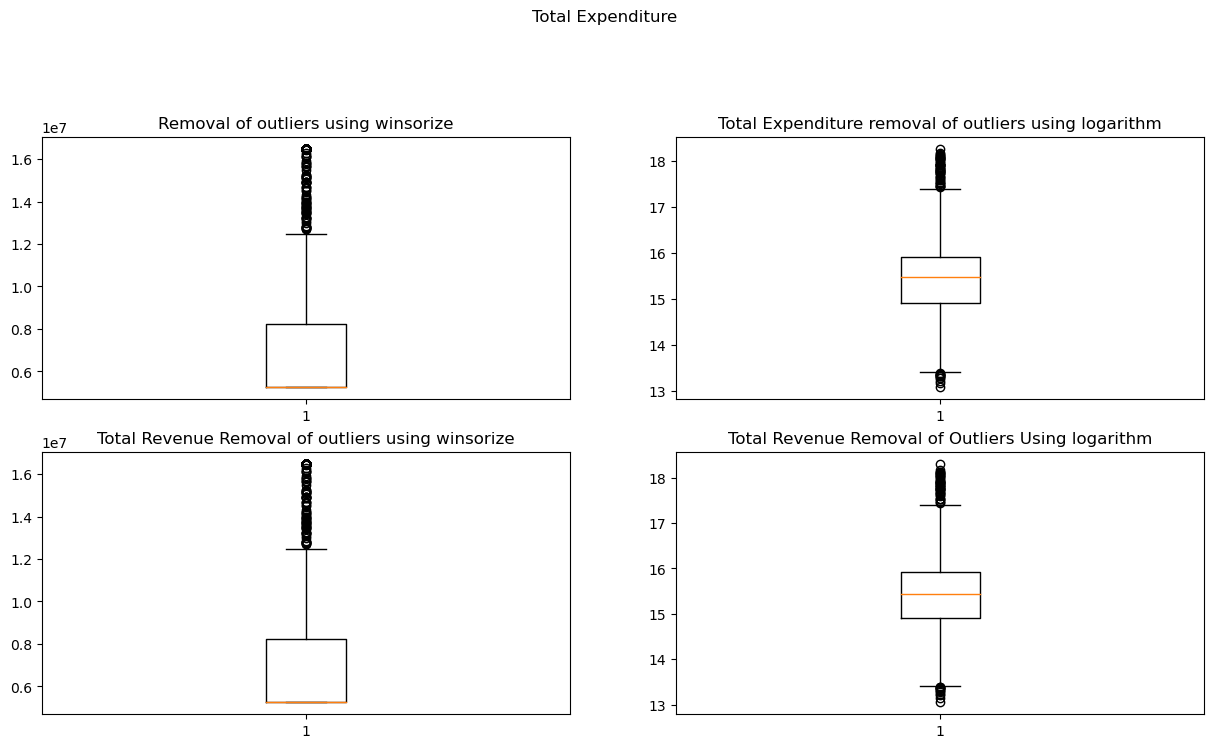

In [59]:
fig, ax = plt.subplots(2,2,figsize=(15,7.5))
fig.suptitle("Total Expenditure", y=1.05)

#
# Winsorize for total expediture
#

# Got rid of the outliers, but not what parameters to use.
# The mean with the outliers and no outliers is similiar.
total_expenditure_winsorization = winsorize(data_frame_2["TOTAL_EXPENDITURE"],(.4,.11))
ax[0,0].set_title("Removal of outliers using winsorize")
ax[0,0].boxplot(total_expenditure_winsorization)

#
# Logarithm on Total Expenditure
#
total_expenditure_log = np.log(data_frame_2["TOTAL_EXPENDITURE"])
ax[0,1].boxplot(total_expenditure_log)
ax[0,1].set_title("Total Expenditure removal of outliers using logarithm")

#
# Winsorize for total revenue
#
total_revenue_winsorization = winsorize(data_frame_2["TOTAL_REVENUE"],(.4,.11))
ax[1,0].boxplot(total_expenditure_winsorization)
ax[1,0].set_title("Total Revenue Removal of outliers using winsorize")

#
# Logarithm for total revenu
#
total_revenue_log = np.log(data_frame_2["TOTAL_REVENUE"])
plt.boxplot(total_revenue_log)
plt.title("Total Revenue Removal of Outliers Using logarithm")
plt.show()

plt.show()


In [70]:
df_winsorize_comparision = pd.concat(
    [data_frame_2.TOTAL_REVENUE.describe(), 
     pd.Series(total_revenue_winsorization).describe()], axis=1)

df_winsorize_comparision.columns = ['TOTAL_Revenue', 'Winsorize_Total_Revenue']

def row_equal(row):
    result = True if ( row.TOTAL_Revenue == row.Winsorize_Total_Revenue ) else False
    return result
    

# for index,row in df_winsorize_comparision.iterrows():
#     df_winsorize_comparision.style.apply('background-color: orange')
#     print("Are rows = ", row_equal(row))
#     #= 'background-color: orange'
#     print(index)

#     print("----")

print(type(df_winsorize_comparision))
df_winsorize_comparision.style.apply({'font-size': '30pt'})
#df_winsorize_comparision.style.set_properties(**{'font-size':'30pt'})

df_winsorize_comparision

<class 'pandas.core.frame.DataFrame'>


,TOTAL_Revenue,Winsorize_Total_Revenue
count,1.715000e+03,1.715000e+03
mean,8.071645e+06,7.388782e+06
std,1.028917e+07,3.927881e+06
min,4.656500e+05,5.085826e+06
25%,2.992297e+06,5.085826e+06
50%,5.085826e+06,5.085826e+06
75%,8.165744e+06,8.165744e+06
max,8.921726e+07,1.636192e+07


<AxesSubplot:>

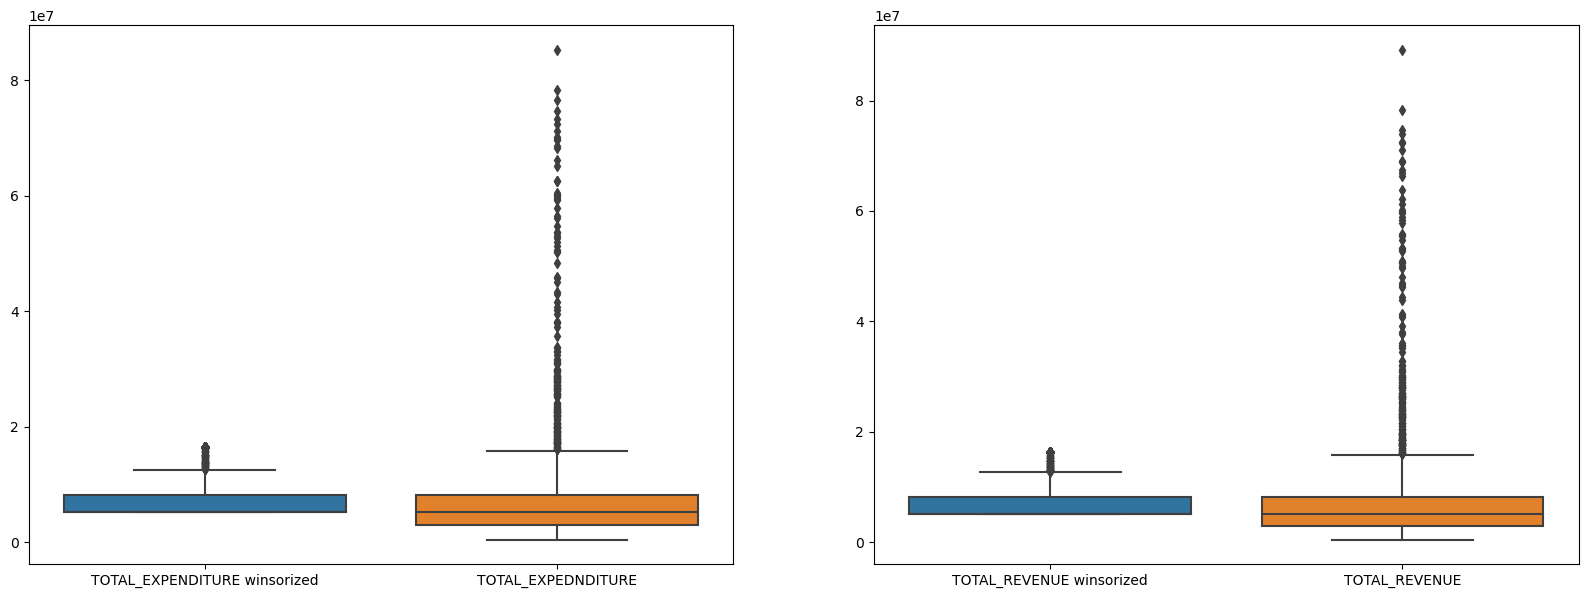

In [61]:
# Note that the central tendancy has changed significantly
# We are limiting the values to 85%, but it could be 5 or 2.5 percent
fig, ax = plt.subplots(1,2,figsize=(20,7))
data_expenditure = pd.concat(\
    [pd.Series(total_expenditure_winsorization),
     data_frame_2['TOTAL_EXPENDITURE']], axis=1)
data_expenditure.columns = ['TOTAL_EXPENDITURE winsorized', 'TOTAL_EXPEDNDITURE']
sns.boxplot(data=data_expenditure, ax=ax[0])

####

data_expenditure = pd.concat(\
    [pd.Series(total_revenue_winsorization),
     data_frame_2['TOTAL_REVENUE']], axis=1)
data_expenditure.columns = ['TOTAL_REVENUE winsorized', 'TOTAL_REVENUE']
sns.boxplot(data=data_expenditure, ax=ax[1])

Text(0.5, 0, 'TOTAL_EXPENDITURE (log scale)')

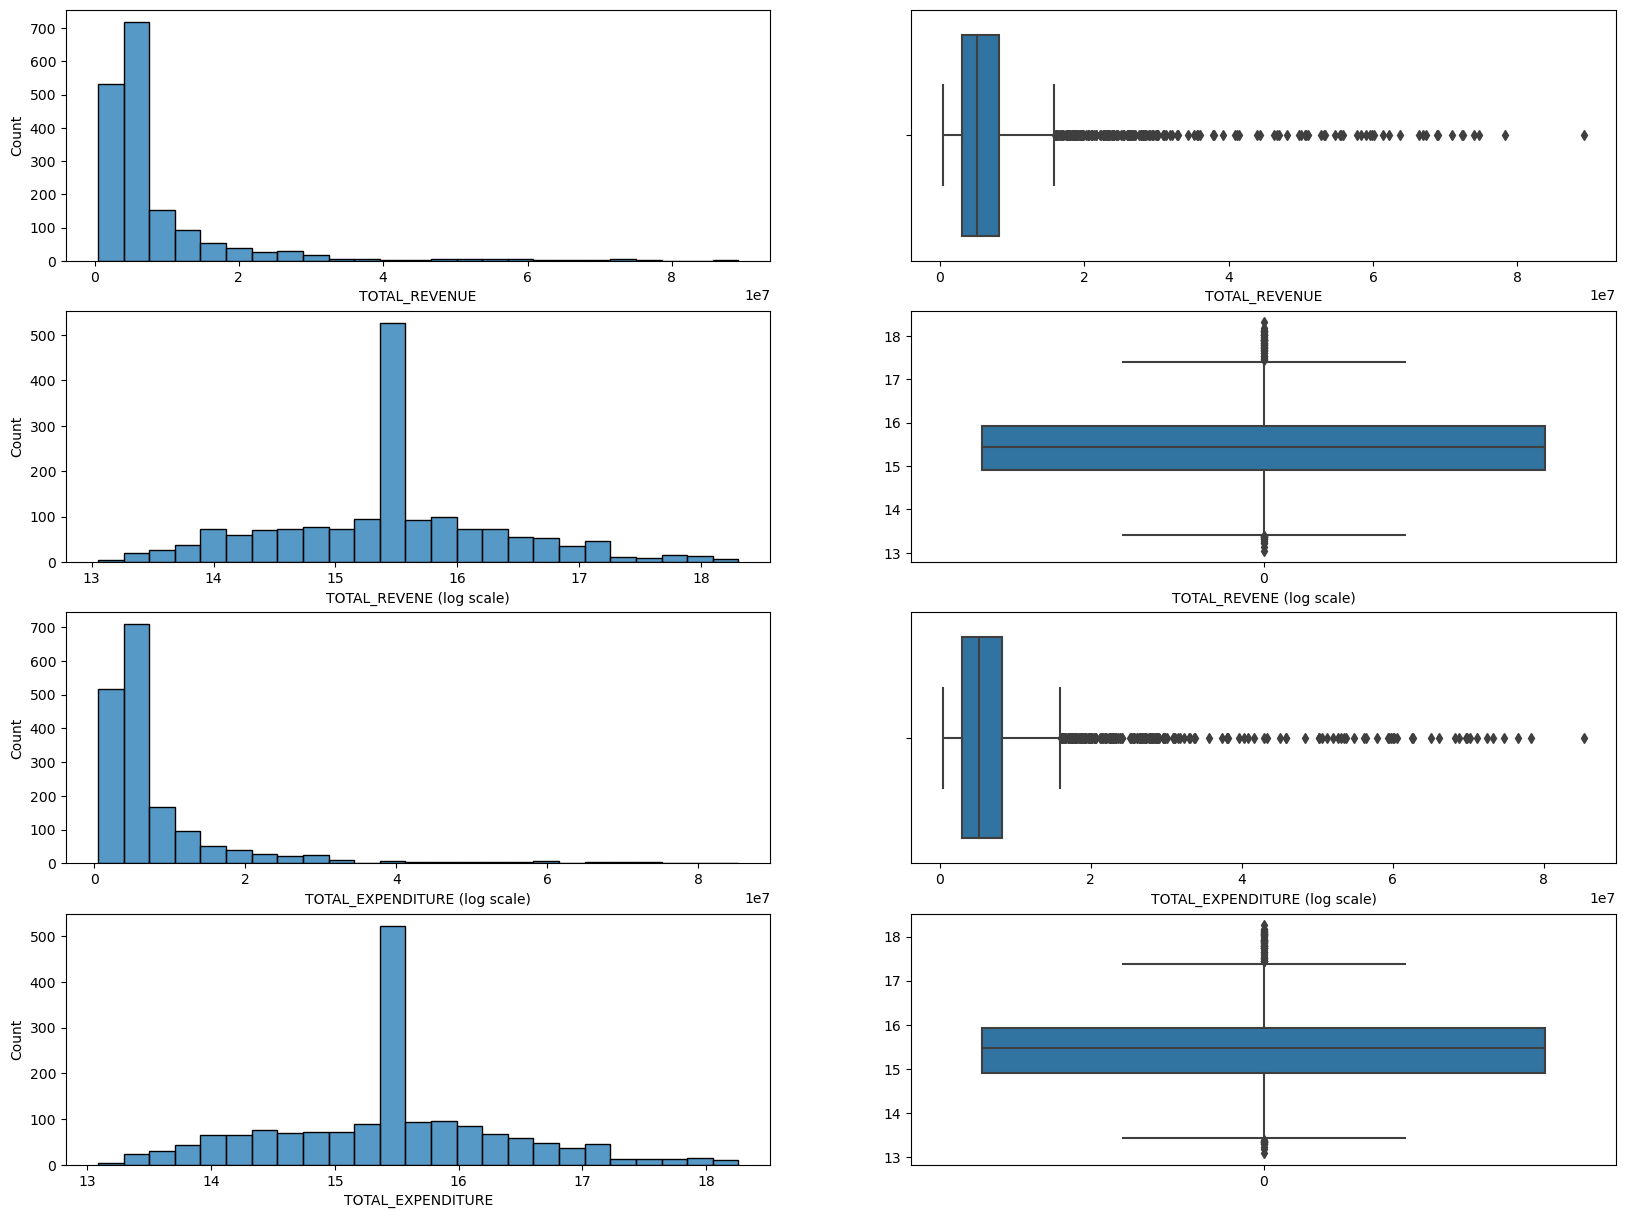

In [62]:
# Lets Transofrm them by log transofrmation to narrow the range of values o the impact 
# of outliers on the entire class decreases
#
# We have too many outliers and out distribution has changed.  This is not a very good
# method for handling data with to many outlier. Use it with a few outliers
#
# Use when we have a wide range of data to make it compact and too many outliers.  Use 
# when you have a standard deviation.
fig,ax = plt.subplots(4,2,figsize=(20,15))

sns.histplot(data_frame_2['TOTAL_REVENUE'], ax=ax[0,0], bins=25)
sns.boxplot(data=data_frame_2, x='TOTAL_REVENUE', ax=ax[0,1], whis=1.5)

sns.histplot(np.log(data_frame_2['TOTAL_REVENUE']), ax=ax[1,0],bins=25)
ax[1,0].set_xlabel('TOTAL_REVENE (log scale)')

sns.boxplot(np.log(data_frame_2['TOTAL_REVENUE']), ax=ax[1,1], whis=1.5)
ax[1,1].set_xlabel('TOTAL_REVENE (log scale)')

############

sns.histplot(data_frame_2['TOTAL_EXPENDITURE'], ax=ax[2,0], bins=25)
sns.boxplot(data=data_frame_2, x='TOTAL_EXPENDITURE', ax=ax[2,1], whis=1.5)

sns.histplot(np.log(data_frame_2['TOTAL_EXPENDITURE']), ax=ax[3,0],bins=25)
ax[2,0].set_xlabel('TOTAL_EXPENDITURE (log scale)')

sns.boxplot(np.log(data_frame_2['TOTAL_EXPENDITURE']), ax=ax[3,1], whis=1.5)
ax[2,1].set_xlabel('TOTAL_EXPENDITURE (log scale)')



In [63]:
# Example of Logarithms -- The distance between log for exponents becomes a constant 
# value for value of exponents

[1,2,3,4]
print(np.log(1) - np.log(3) == np.log(1/3))
print('1-2 = ', 1-2)
print(np.log(1) - np.log(2))
print(np.log(2) - np.log(3))
print(np.log(3) - np.log(4))
print(np.log(4) - np.log(5))

print('10-100 =', 10-100)
print(np.log(10) - np.log(100))
print(np.log(100) - np.log(1000))
print(np.log(1000) - np.log(10000))
print(np.log(10000) - np.log(100000))

True
1-2 =  -1
-0.6931471805599453
-0.4054651081081645
-0.2876820724517808
-0.2231435513142097
10-100 = -90
-2.302585092994046
-2.302585092994045
-2.302585092994047
-2.302585092994045


In [64]:
#
#  Ask how to correct this
#
# Calculate the number of number of outlier values with and without the log
# The log transofrmation copacted the data
#
p25_log, p75_log = np.percentile(np.log(data_frame_2['TOTAL_REVENUE']), [25,75])
p25, p75 = np.percentile(data_frame_2['TOTAL_REVENUE'],[25,75])

IQR = p75 - p25
IQR_log = p75_log - p25_log

print("p25_log = ", p25_log)
print("p75_log = ", p75_log)
print("p25 = ", p25)
print("p75 = ", p75)

log_threshold_values = []
for threshold_value in np.arange(1,5,0.5):
    min_value_log = p25_log - (IQR_log*threshold_value)
    max_value_log = p75_log - (IQR_log*threshold_value)
    min_value = p25 - (IQR*threshold_value)
    max_value = p75 - (IQR*threshold_value)
    print("threshold value", threshold_value)
    print("Min Value/Max Value log", min_value_log, max_value_log)
    print("Min Value/Max Value", min_value_log, max_value_log)

    outlier_value_number_log = len(np.where(
        (np.log(data_frame_2['TOTAL_REVENUE']) > max_value_log)|
        (np.log(data_frame_2['TOTAL_REVENUE']) < min_value_log))[0])
    
    outlier_value_number = len(np.where(
        (data_frame_2['TOTAL_REVENUE'] > max_value)|
        (data_frame_2['TOTAL_REVENUE'] < min_value))[0])
    
    log_threshold_values.append({'threshold_value': threshold_value,
                                 'outlier_value_number' : outlier_value_number,
                                 'outlier_value_number_log': outlier_value_number_log })
    
df_outliers = pd.DataFrame(log_threshold_values)
df_outliers



p25_log =  14.911550535446587
p75_log =  15.915458385752217
p25 =  2992297.0
p75 =  8165744.0
threshold value 1.0
Min Value/Max Value log 13.907642685140956 14.911550535446587
Min Value/Max Value 13.907642685140956 14.911550535446587
threshold value 1.5
Min Value/Max Value log 13.405688759988141 14.409596610293772
Min Value/Max Value 13.405688759988141 14.409596610293772
threshold value 2.0
Min Value/Max Value log 12.903734834835326 13.907642685140956
Min Value/Max Value 12.903734834835326 13.907642685140956
threshold value 2.5
Min Value/Max Value log 12.401780909682511 13.405688759988141
Min Value/Max Value 12.401780909682511 13.405688759988141
threshold value 3.0
Min Value/Max Value log 11.899826984529696 12.903734834835326
Min Value/Max Value 11.899826984529696 12.903734834835326
threshold value 3.5
Min Value/Max Value log 11.397873059376881 12.401780909682511
Min Value/Max Value 11.397873059376881 12.401780909682511
threshold value 4.0
Min Value/Max Value log 10.895919134224066 11.

,threshold_value,outlier_value_number,outlier_value_number_log
0,1.0,1286,1379
1,1.5,1715,1469
2,2.0,1715,1622
3,2.5,1715,1702
4,3.0,1715,1715
5,3.5,1715,1715
6,4.0,1715,1715
7,4.5,1715,1715


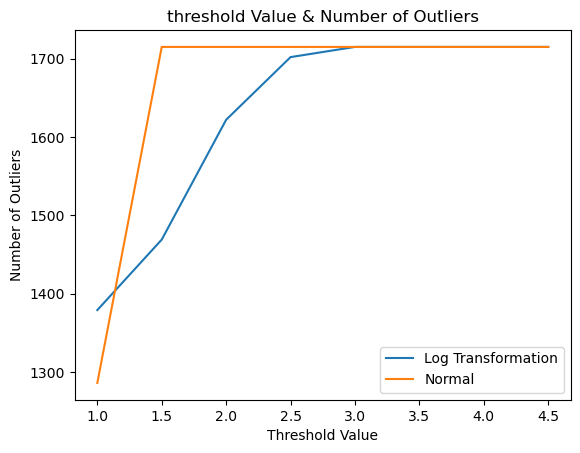

In [65]:
# The Blue line is the log transformation.  More abrupt decrease
# The Yellow Line ( IQR) is slower

df_outliers.plot(x = 'threshold_value', y=['outlier_value_number_log', 'outlier_value_number'])
plt.title('threshold Value & Number of Outliers')
plt.xlabel('Threshold Value')
plt.ylabel('Number of Outliers')
plt.legend(('Log Transformation', 'Normal'))
plt.show()

## Create another variable 

By subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable.

/Users/charles/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:ylabel='Frequency'>

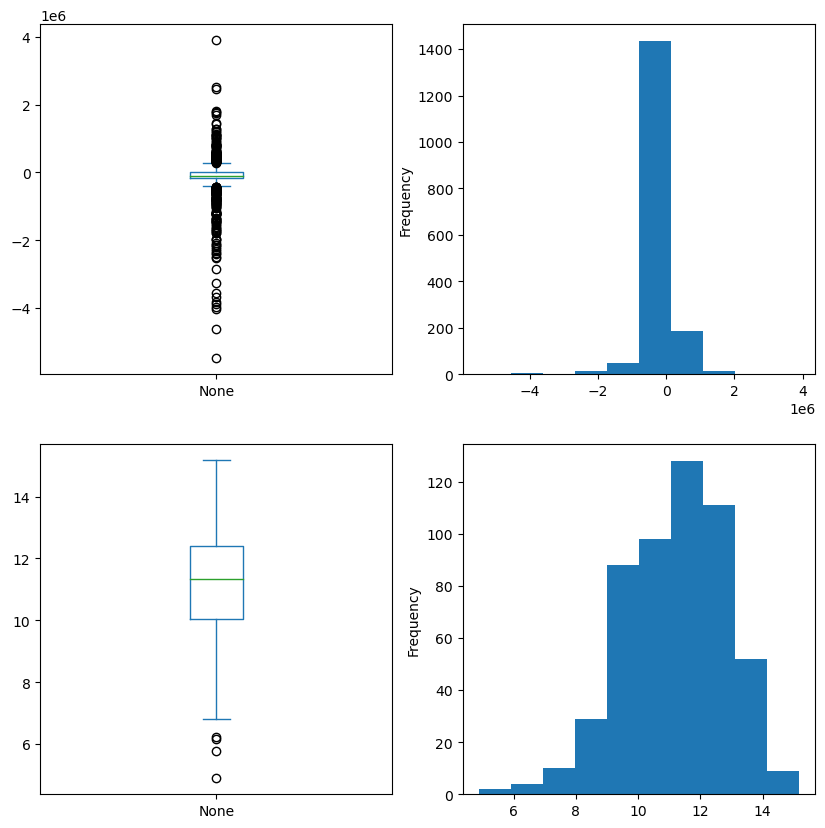

In [66]:
deficit_dataframe = data_frame_2['TOTAL_REVENUE'] - data_frame_2['TOTAL_EXPENDITURE']
fig, ax = plt.subplots(2,2)
deficit_dataframe.plot(kind='box', figsize=(10,10), ax=ax[0,0])
deficit_dataframe.plot(kind='hist', figsize=(10,10), ax=ax[0,1])

deficit_dataframe_logscale = np.log(data_frame_2['TOTAL_REVENUE'] - 
                                    data_frame_2['TOTAL_EXPENDITURE'])
deficit_dataframe_logscale.plot(kind='box', figsize=(10,10), ax=ax[1,0])
deficit_dataframe_logscale.plot(kind='hist', figsize=(10,10), ax=ax[1,1])

## Create another variable 

by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. 

This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. 
In this newly created variable, can you find any outliers? If so, eliminate them

Todo Can also use winsorize which is preferred.

Can create a problem since revenue - expenditure when using log scale it is giving negative values, so it will raise a false positive.  

The result you get has to make sense in context of the problem.

/Users/charles/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:ylabel='Frequency'>

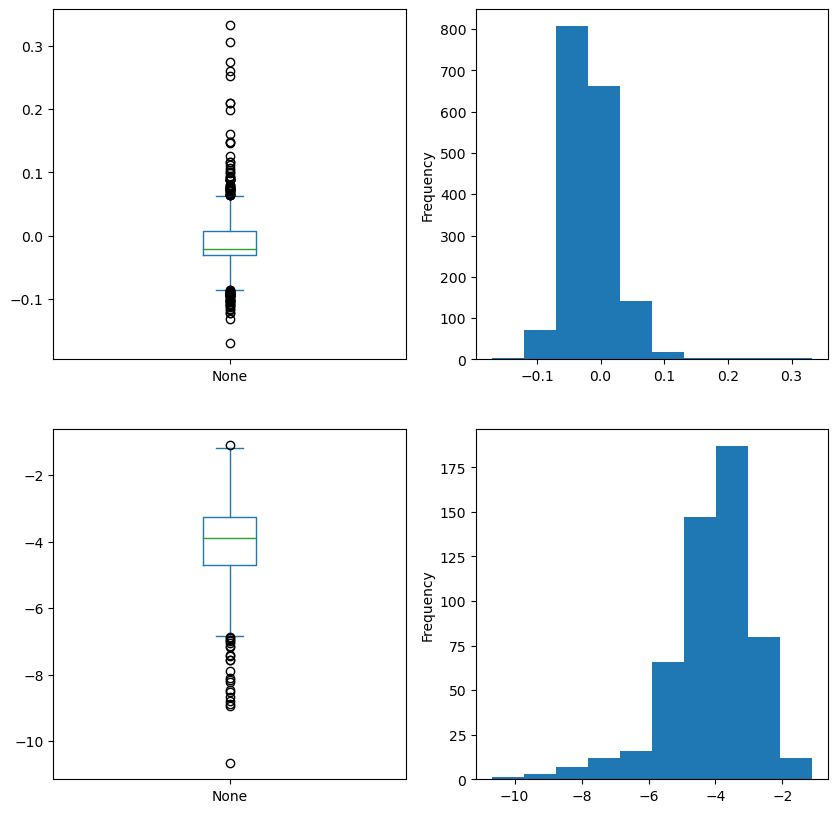

In [67]:
deficit_df_log_individual = np.log(data_frame_2['TOTAL_REVENUE']) - \
    np.log(data_frame_2['TOTAL_EXPENDITURE'])

fig, ax = plt.subplots(2,2)
deficit_df_log_individual.plot(kind='box', figsize=(10,10), ax=ax[0,0])
deficit_df_log_individual.plot(kind='hist', figsize=(10,10), ax=ax[0,1])

deficit_df_log_individual_log = np.log(np.log(data_frame_2['TOTAL_REVENUE']) - \
    np.log(data_frame_2['TOTAL_EXPENDITURE']))

deficit_df_log_individual_log.plot(kind='box', figsize=(10,10), ax=ax[1,0])
deficit_df_log_individual_log.plot(kind='hist', figsize=(10,10), ax=ax[1,1])

5. Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?

In [68]:
# What are you doing with the two describes

deficit_dataframe
outlier_comparison_df = pd.concat(\
        [deficit_dataframe.describe().describe(),
         deficit_dataframe_logscale.describe(),
         deficit_df_log_individual.describe(),
         deficit_df_log_individual_log.describe().describe()],axis=1)
outlier_comparison_df.columns = ['original', 'log_scale', 'original_log', 'original_log_scale']
outlier_comparison_df

,original,log_scale,original_log,original_log_scale
count,8.000000e+00,531.000000,1715.000000,8.000000
mean,-1.821152e+05,11.209468,-0.012111,63.068459
std,2.544843e+06,1.628871,0.039487,189.103714
min,-5.487742e+06,4.890349,-0.170369,-10.671270
25%,-1.274901e+05,10.031516,-0.030374,-4.249574
50%,-5.276350e+04,11.333356,-0.021601,-3.584259
75%,1.374814e+05,12.388852,0.006974,-0.503397
max,3.897129e+06,15.175751,0.332627,531.000000


## If your variable of interest is budget deficit variable, 

which method do you think is the most appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question?

winsorize is preferred basue there are too many outliers

Logging can be useful tool for dealing with outliers in data.  A logging transformation can help reduct the inpact of extreme values makeing it easier to visualize and analyze data

Situations where you migth consider log

1. When the data is heavily skewed with a long tail on one end of the distrubution, a
log transformation can help make the data more symmetric.  
2. If the data has a wide range of values with some some extreme values that are much large or msmaller than the rest.  
3. A log transformatin can make it easier to compare different values.  When the data is non-normal if the data is normallly distrubuted a log tansformation can help to make it normal

Winsorize
1. When outliers are due to measurement error rather than actual extreme values in the 
data
2.  When the outliers are extreme but valid but are distorting the overall pattern of the data 
3.  When the data is not normal they can bring the distrubiton closer to the normal

Winsorization drawbacks: 
A loss of information 
pottentially distort the true distributino of the data
